In [1]:
# import tensorflow -check the version
import tensorflow as tf
print(tf.__version__)

2.2.0


MNIST is a dataset containing handwritten digits

task : To accept as input an image and then classify what digit it is.

It is a Multi class classification problem

Each image is of the same size 28*28=784 pixels(grayscale)

In [3]:
# pip install tensorflow
# pip install keras

In [4]:
# Load the data
mnist=tf.keras.datasets.mnist

In [5]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
xtrain.shape

(60000, 28, 28)

In [9]:
ytrain.shape

(60000,)

In [10]:
xtest.shape

(10000, 28, 28)

In [11]:
ytest.shape

(10000,)

In [13]:
##2. Design of NN
# NN Model design

model= tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(90,activation='relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10,activation='softmax')
                                  ])

In [14]:
#3. Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
#4. Train the model - Fit 
r=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3527 - accuracy: 0.6831 - val_loss: 0.6442 - val_accuracy: 0.8713
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7206 - accuracy: 0.8011 - val_loss: 0.4282 - val_accuracy: 0.9022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5897 - accuracy: 0.8350 - val_loss: 0.3767 - val_accuracy: 0.9128
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4955 - accuracy: 0.8611 - val_loss: 0.3430 - val_accuracy: 0.9190
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4628 - accuracy: 0.8709 - val_loss: 0.3341 - val_accuracy: 0.9192
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4348 - accuracy: 0.8795 - val_loss: 0.2796 - val_accuracy: 0.9264
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4163 - accuracy: 0.8844 - val_loss: 0.2883 - val_accuracy:

In [16]:
#4. Train the model - Fit 
result=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3618 - accuracy: 0.9009 - val_loss: 0.3156 - val_accuracy: 0.9341
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3567 - accuracy: 0.9036 - val_loss: 0.3270 - val_accuracy: 0.9384
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.9033 - val_loss: 0.2978 - val_accuracy: 0.9377
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3432 - accuracy: 0.9073 - val_loss: 0.3328 - val_accuracy: 0.9290
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3504 - accuracy: 0.9060 - val_loss: 0.3131 - val_accuracy: 0.9412
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3409 - accuracy: 0.9093 - val_loss: 0.3311 - val_accuracy: 0.9354
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.9115 - val_loss: 0.3821 - val_accuracy:

Loss graph

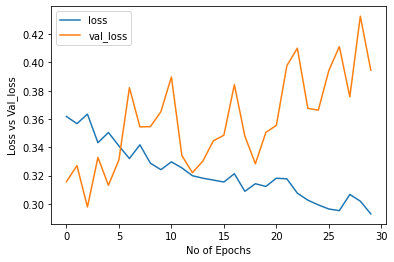

In [17]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'],label='loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Loss vs Val_loss')
plt.show()

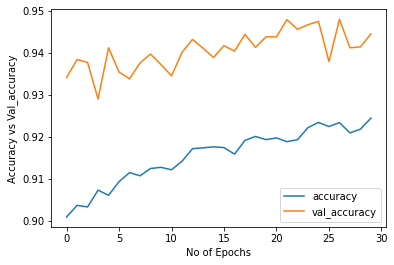

In [18]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'],label='accuracy')
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy vs Val_accuracy')
plt.show()

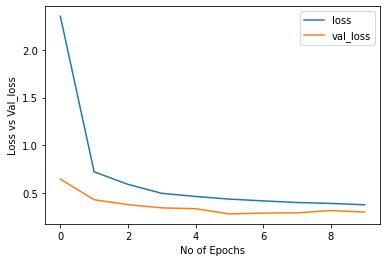

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Loss vs Val_loss')
plt.show()

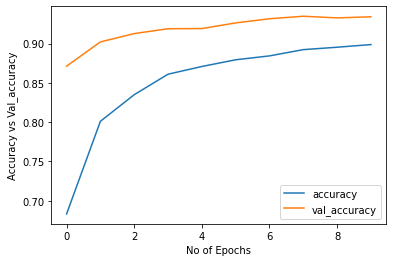

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy vs Val_accuracy')
plt.show()

In [21]:
#5.Model evaluation
print(model.evaluate(xtest,ytest))

313/313 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.9445
[0.3944966495037079, 0.9445000290870667]


Confusion matrix, without normalization
[[ 965    0    0    0    2    0    4    1    7    1]
 [   0 1112    3    2    0    2    1    1   14    0]
 [   5    3  935   27    3    2    1    5   50    1]
 [   1    1    3  936    0   23    0    4   41    1]
 [   1    8    1    0  931    1    3    0    9   28]
 [   2    0    0   20    1  825    8    0   36    0]
 [   6    2    0    0   15   10  913    0   12    0]
 [   1    7   10   16    3    1    0  965    7   18]
 [   5    3    2    6    8    3    8    1  930    8]
 [   1    6    0   12   20    8    0    2   27  933]]


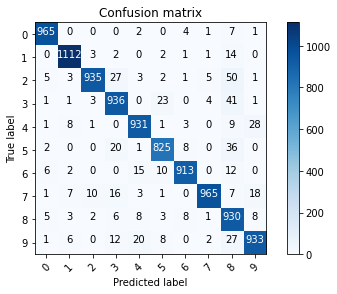

In [23]:
# Plot confusion matrix
# Kindly dont focus on the details of implementation of the code below
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
 """
 This function prints and plots the confusion matrix.
 Normalization can be applied by setting `normalize=True`.
 """
 if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
 else:
     print('Confusion matrix, without normalization')

 print(cm)

 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)

 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.show()


p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 



Text(0.5, 1.0, 'True Label : 2 Predicted label:8')

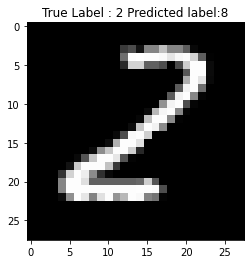

In [24]:
mis_img=np.where(p_test!=ytest)[0]
i=np.random.choice(mis_img)
plt.imshow(xtest[i],cmap='gray')
plt.title('True Label : %s Predicted label:%s'%(ytest[i],p_test[i]))

Text(0.5, 1.0, 'True Label : 3 Predicted label:9')

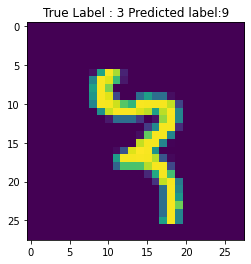

In [25]:
mis_img=np.where(p_test!=ytest)[0]
i=np.random.choice(mis_img)
plt.imshow(xtest[i])
plt.title('True Label : %s Predicted label:%s'%(ytest[i],p_test[i]))

Text(0.5, 1.0, 'True Label : 9 Predicted label:3')

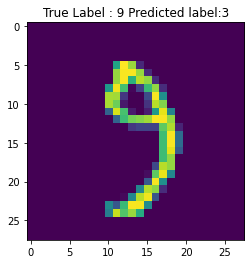

In [26]:
mis_img=np.where(p_test!=ytest)[0]
i=np.random.choice(mis_img)
plt.imshow(xtest[i])
plt.title('True Label : %s Predicted label:%s'%(ytest[i],p_test[i]))

Text(0.5, 1.0, 'True Label : 3 Predicted label:8')

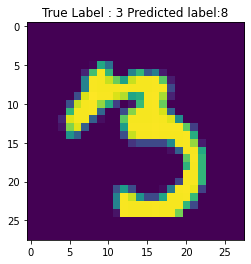

In [27]:
mis_img=np.where(p_test!=ytest)[0]
i=np.random.choice(mis_img)
plt.imshow(xtest[i])
plt.title('True Label : %s Predicted label:%s'%(ytest[i],p_test[i]))

Text(0.5, 1.0, 'True Label : 6 Predicted label:5')

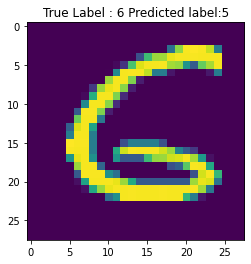

In [28]:
mis_img=np.where(p_test!=ytest)[0]
i=np.random.choice(mis_img)
plt.imshow(xtest[i])
plt.title('True Label : %s Predicted label:%s'%(ytest[i],p_test[i]))